Result (Backward Interpolation): 42.875


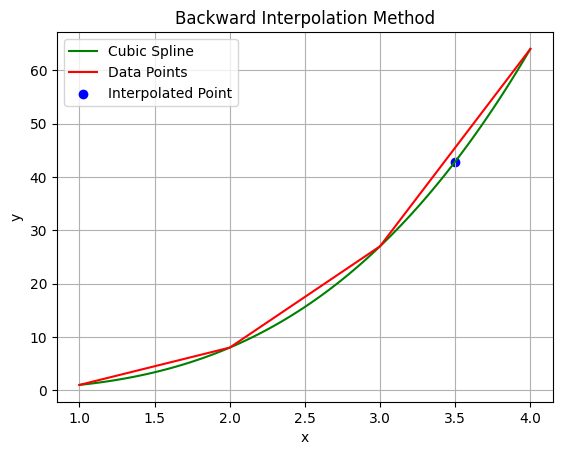

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

def backward_interpolation_method(data, x_n):
    arr = []
    arr.append([x for x, y in data])
    arr.append([y for x, y in data])

    # difference table
    for i in range(2, 5):  # 5 is arbitrary (number of levels of differences)
        temp = []
        for j in range(1, len(arr[i-1])):
            temp.append(arr[i-1][j] - arr[i-1][j-1])
        arr.append(temp)

    # step size
    h = arr[0][1] - arr[0][0]

    # u calculation for backward interpolation
    u = (x_n - arr[0][-1]) / h

    # coefficients (from last elements)
    first = arr[1][-1]
    second = arr[2][-1] * u
    third = arr[3][-1] * u * (u + 1) / 2
    fourth = arr[4][-1] * u * (u + 1) * (u + 2) / 6

    result = first + second + third + fourth

    print("Result (Backward Interpolation):", result)
    return result


# Example data
data = [(1, 1), (2, 8), (3, 27), (4, 64)]
x_n = 3.5

# find interpolated value
y_n = backward_interpolation_method(data, x_n)

# plotting
x, y = zip(*data)
x, y = np.array(x), np.array(y)
fn = interp1d(x, y, kind='cubic')
x_new = np.linspace(x.min(), x.max(), 100)
y_new = fn(x_new)

plt.plot(x_new, y_new, label='Cubic Spline', color='green')
plt.plot(*zip(*data), color='red', label='Data Points')
plt.scatter(x_n, y_n, color='blue', label='Interpolated Point')
plt.title('Backward Interpolation Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
